## A quick implementation of Yann LeCun's LeNet5
We will be training on the MNIST dataset of handwritten digits, through which LeNet gained it's fame.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train / 255).reshape(60000, 28, 28, 1)
x_test = (x_test / 255).reshape(10000, 28, 28, 1)
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


The structure of LeCun's LeNet5 can be found in many resources online. It introduces the now standard structure of convolutional layers followed by pooling layers. The network (and the dataset) is small enough to be run on a small machine in very little time.

In [4]:
inputs = tf.keras.Input(shape=(28, 28, 1))
X = tf.keras.layers.Conv2D(filters=6, kernel_size=5, padding="same", strides=1, activation="tanh", input_shape=(None,28,28,1), name="conv1")(inputs)
X = tf.keras.layers.AveragePooling2D(pool_size=2, padding="valid", strides=2)(X)
X = tf.keras.layers.Conv2D(filters = 16, kernel_size=5, padding="valid", strides=1, activation="tanh")(X)
X = tf.keras.layers.AveragePooling2D(pool_size=2, padding="valid", strides=2)(X)
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(units=120, activation="tanh")(X)
X = tf.keras.layers.Dense(units=84, activation="tanh")(X)
outputs = tf.keras.layers.Dense(units=10, activation="softmax")(X)


model = tf.keras.Model(inputs = inputs, outputs = outputs)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)



In [5]:
model.compile(optimizer = opt, loss ="categorical_crossentropy" , metrics = ["accuracy"])

In [6]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2333 - accuracy: 0.9284
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1359 - accuracy: 0.9595
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1149 - accuracy: 0.9658
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1077 - accuracy: 0.9683
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9707


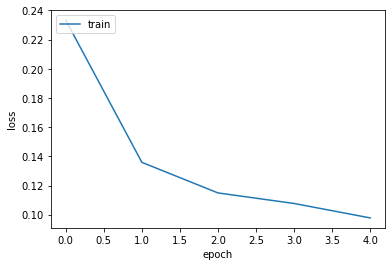

In [7]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The loss seems to have converged by the fifth epoch.

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9635


[0.1133158951997757, 0.9635000228881836]

On the validation set, we obtain an accuracy of 97.1%. Apparently, we have not overfit the data at all.

### Maxpooling
Now, switch the averagepooling out for more modern maxpooling layers. Let's see if this can enhance performance.

In [9]:
inputs = tf.keras.Input(shape=(28, 28, 1))
X = tf.keras.layers.Conv2D(filters=6, kernel_size=5, padding="same", strides=1, activation="tanh", input_shape=(None,28,28,1), name="conv1")(inputs)
X = tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", strides=2)(X)
X = tf.keras.layers.Conv2D(filters = 16, kernel_size=5, padding="valid", strides=1, activation="tanh")(X)
X = tf.keras.layers.MaxPool2D(pool_size=2, padding="valid", strides=2)(X)
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(units=120, activation="tanh")(X)
X = tf.keras.layers.Dense(units=84, activation="tanh")(X)
outputs = tf.keras.layers.Dense(units=10, activation="softmax")(X)


model2 = tf.keras.Model(inputs = inputs, outputs = outputs)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer = opt, loss ="categorical_crossentropy" , metrics = ["accuracy"])

In [10]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1549 - accuracy: 0.9526
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9733
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9754
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9757
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0838 - accuracy: 0.9744


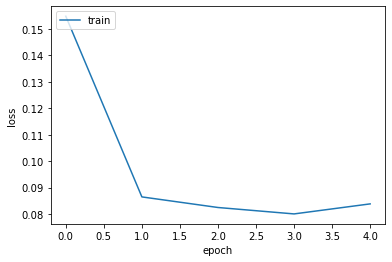

In [11]:
plt.plot(history2.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We see that the loss actually goes up after the third epoch. Let's see if we can fix this by using a smaller learning rate. Hence, just keep training the model from before, and see if it "goes back" to the minimum and then actually converges.

In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer = opt, loss ="categorical_crossentropy" , metrics = ["accuracy"])

In [13]:
history3 = model2.fit(x_train, y_train, batch_size=128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9831
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.9923
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0201 - accuracy: 0.9944
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.9960


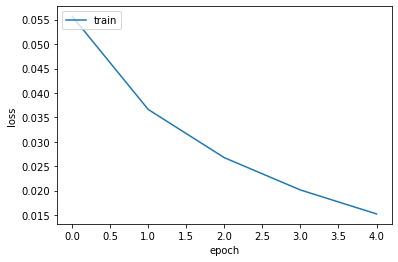

In [14]:
plt.plot(history3.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The smaller learning rate fixed the problem of leaving the optimum. Lastly, check the validation error for the maxpooling model:

In [15]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9851


[0.048245351761579514, 0.9850999712944031]

Observe that this model improves the first one quite a bit! We do have a larger discrepancy between training and valdiation error, but we still have an increase of more than one percentage point.